In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# 1. Commençons par le commencement

## a. Chargement du fichier

In [2]:
PATH = 'googleplaystore_used.csv'

In [3]:
google = pd.read_csv(PATH, sep = ',')

Suite à l'exercice avec les applications populaires, on supprime ici les doublons.

In [4]:
google = google.drop_duplicates('App')

## b. Enquête sur sa structure

Quid du nombre de lignes et de colonnes ? Quid de sa taille ?

In [5]:
google.shape

(9660, 13)

In [6]:
google.size

125580

Que pouvons-nous savoir sur les types des colonnes ?

In [7]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            8197 non-null float64
Reviews           9660 non-null float64
Size              8432 non-null float64
Installs          9660 non-null int64
Type              9659 non-null object
Price             9659 non-null float64
Content Rating    9659 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9652 non-null object
Android Ver       9657 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


## c. Sélectionner les 10 premières lignes

In [8]:
google.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## d. Sélectionner les 10 dernières lignes

In [9]:
google.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38.0,9.800,5000,Free,0.0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195.0,0.582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,0.619,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7.0,2.600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0.0,9.600,10,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.600,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.500,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307.0,19.000,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


# 2. Analysons de plus près les « ratings »

## a. Enregistrer une copie de la colonne "Rating" dans la variable ratings

In [10]:
ratings = google['Rating'].copy()

## b. Méthode describe

In [11]:
ratings.describe()

count    8197.000000
mean        4.175052
std         0.561026
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

## c. Est-ce qu'il y a des valeurs aberrantes ?

Oui, nous pouvons remarquer qu'il y a une ou plusieurs colonnes qui dépassent le rating autorisé (c'est-à-dire, 5). Vérifions cela avec une condition :

In [12]:
ratings[ratings > 5]

10472    19.0
Name: Rating, dtype: float64

En effet, il y a une application qui possède un rating erroné. Supprimons-la.

In [13]:
ratings = ratings[ratings <= 5]

## d. On réopère la méthode describe

In [14]:
ratings.describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

## e. value_counts

In [15]:
ratings.value_counts()

4.3    897
4.4    895
4.5    848
4.2    810
4.6    683
4.1    621
4.0    513
4.7    442
3.9    359
3.8    286
5.0    271
3.7    224
4.8    221
3.6    167
3.5    156
3.4    126
3.3    100
4.9     85
3.0     81
3.1     69
3.2     63
2.9     45
2.8     40
2.6     24
2.7     23
2.3     20
2.5     20
2.4     19
1.0     16
2.2     14
2.0     12
1.9     11
1.7      8
2.1      8
1.8      8
1.6      4
1.4      3
1.5      3
1.2      1
Name: Rating, dtype: int64

## f. Affiner avec bins

In [16]:
ratings.value_counts(bins = 5)

(4.2, 5.0]      4342
(3.4, 4.2]      3136
(2.6, 3.4]       547
(1.8, 2.6]       128
(0.995, 1.8]      43
Name: Rating, dtype: int64

## g. Créer ses propres bins

In [17]:
custom_bins = pd.interval_range(0, 5, freq = 1)

In [18]:
counts = ratings.value_counts(bins=custom_bins)

In [19]:
counts

(4, 5]    5773
(3, 4]    2063
(2, 3]     294
(1, 2]      50
(0, 1]      16
Name: Rating, dtype: int64

## h. Créer un graphique en camembert

In [20]:
# inversion des légendes
interval_names = list(map(lambda i: '({}-{}]'.format(i.left, i.right), list(custom_bins)))

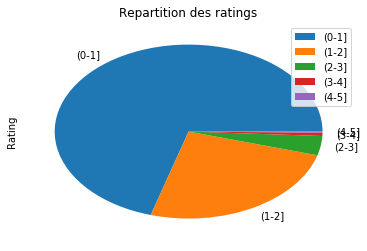

In [21]:
plt.title('Repartition des ratings')
pd.Series(counts).plot.pie(labels = interval_names, legend=True)

# 3. Un peu de nettoyage n'a jamais fait de mal...

## a. Sauvegarder dans android_ver

In [22]:
android_ver = google['Android Ver'].copy()

## b. Observer le value_counts

In [23]:
android_ver.value_counts()

4.1 and up            2202
4.0.3 and up          1395
4.0 and up            1285
Varies with device     990
4.4 and up             818
2.3 and up             616
5.0 and up             512
4.2 and up             372
2.3.3 and up           273
2.2 and up             239
3.0 and up             231
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
1.0 and up               2
5.0 - 8.0                2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
5.0 - 7.1.1              1
4.1 - 7.1.1              1
7.0 - 7.1.1              1
2.2 - 7.1.1              1
Name: Android Ver, dtype: int64

## c. Créer une fonction qui garde le numéro principal de la version

In [24]:
def keep_major_num(str_value):
    try:
        return int(str_value[0])
    except:
        return np.nan

## d. Créer une nouvelle colonne en *appliquant* notre fonction

In [25]:
google['Major Android Ver'] = android_ver.apply(keep_major_num)

## e. Obtenir les %

In [26]:
google['Major Android Ver'].value_counts(normalize = True) * 100

4.0    72.770278
2.0    15.010961
5.0     6.207454
3.0     3.196031
1.0     1.592246
6.0     0.623053
7.0     0.530749
8.0     0.069228
Name: Major Android Ver, dtype: float64

## f. Avec un histogramme

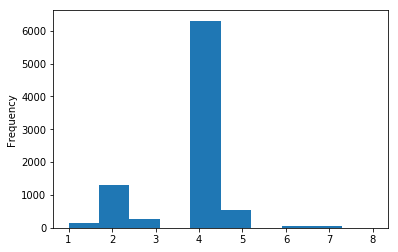

In [27]:
 google['Major Android Ver'].plot(kind='hist')

# 4. Recherchons les applications populaires

## a. Trier par le nombre d'installations

In [28]:
cols_to_display = ['App', 'Installs']
google.sort_values(by = 'Installs', ascending = False)[cols_to_display].head(10)

,App,Installs
336,WhatsApp Messenger,1000000000
152,Google Play Books,1000000000
1654,Subway Surfers,1000000000
3117,Maps - Navigate & Explore,1000000000
340,Gmail,1000000000
2545,Instagram,1000000000
2544,Facebook,1000000000
338,Google Chrome: Fast & Secure,1000000000
2554,Google+,1000000000
3665,YouTube,1000000000


## b. Trier par le nombre d'installations et par le nombre de reviews.

In [29]:
cols_to_display = ['App', 'Installs', 'Reviews']
google.sort_values(by = ['Installs', 'Reviews'], ascending = False)[cols_to_display].head(10)

,App,Installs,Reviews
2544,Facebook,1000000000,78158306.0
336,WhatsApp Messenger,1000000000,69119316.0
2545,Instagram,1000000000,66577313.0
335,Messenger – Text and Video Chat for Free,1000000000,56642847.0
1654,Subway Surfers,1000000000,27722264.0
3665,YouTube,1000000000,25655305.0
2808,Google Photos,1000000000,10858556.0
391,Skype - free IM & video calls,1000000000,10484169.0
338,Google Chrome: Fast & Secure,1000000000,9642995.0
3117,Maps - Navigate & Explore,1000000000,9235155.0
